In [18]:
import matplotlib.pyplot as plt
import numpy as np
import time
import random
import math
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns

O problema das 8 rainhas

In [19]:
# Função para contar o número de conflitos (pares de rainhas se atacando)
def conflitos(tabuleiro):
    conflitos = 0
    tamanho = len(tabuleiro)
    for i in range(tamanho):
        for j in range(i + 1, tamanho):
            if tabuleiro[i] == tabuleiro[j] or abs(tabuleiro[i] - tabuleiro[j]) == abs(i - j):
                conflitos += 1
    return conflitos

In [20]:
# Função f(x): retorna 28 menos o número de pares de rainhas se atacando
def f(tabuleiro):
    total_pares = 28  # Número total de pares entre 8 rainhas (C(8,2) = 28)
    num_conflitos = conflitos(tabuleiro)
    return total_pares - num_conflitos



# Função de vizinhança com perturbação controlada (altera apenas uma posição)
def vizinho_controlado(tabuleiro):
    novo_tabuleiro = tabuleiro[:]
    coluna = random.randint(0, 7)
    linha = random.randint(0, 7)
    novo_tabuleiro[coluna] = linha
    return novo_tabuleiro



# Funções de escalonamento de temperatura
def escalonamento_linear(temperatura_inicial, i, max_iteracoes):
    return temperatura_inicial - i * (temperatura_inicial / max_iteracoes)

def escalonamento_geometrico(temperatura_inicial, fator_resfriamento, i):
    return temperatura_inicial * (fator_resfriamento ** i)

def escalonamento_logaritmico(temperatura_inicial, i):
    return temperatura_inicial / math.log(i + 2)


# Função para desenhar o tabuleiro com as rainhas
def desenha_tabuleiro(tabuleiro):
    tabuleiro_vazio = np.zeros((8, 8))
    for i in range(len(tabuleiro)):
        tabuleiro_vazio[tabuleiro[i], i] = 1

    fig, ax = plt.subplots()
    ax.matshow(tabuleiro_vazio, cmap='binary')

    for i in range(8):
        for j in range(8):
            if tabuleiro_vazio[i, j] == 1:
                ax.text(j, i, '♛', va='center', ha='center', color='red', fontsize=20)

    plt.show()


In [21]:

# Implementação da Têmpera Simulada
def tempera_simulada(temperatura_inicial, max_iteracoes, escalonamento):
    # Inicialização
    tabuleiro = [random.randint(0, 7) for _ in range(8)]
    historico_conflitos = []
    historico_temperatura = []
    i = 0

    while i < max_iteracoes and conflitos(tabuleiro) > 0:
        conflitos_atual = conflitos(tabuleiro)
        historico_conflitos.append(conflitos_atual)

        # Escolha de um vizinho
        novo_tabuleiro = vizinho_controlado(tabuleiro)
        conflitos_novo = conflitos(novo_tabuleiro)

        # Cálculo da diferença de conflitos
        delta_conflitos = conflitos_novo - conflitos_atual

        # Atualização da temperatura
        if escalonamento == 'linear':
            temperatura = escalonamento_linear(temperatura_inicial, i, max_iteracoes)
        elif escalonamento == 'geometrico':
            fator_resfriamento = 0.995  # Pode ser ajustado
            temperatura = escalonamento_geometrico(temperatura_inicial, fator_resfriamento, i)
        elif escalonamento == 'logaritmico':
            temperatura = escalonamento_logaritmico(temperatura_inicial, i)
        else:
            raise ValueError("Tipo de escalonamento inválido. Escolha 'linear', 'geometrico' ou 'logaritmico'.")

        historico_temperatura.append(temperatura)

        # Critério de aceitação
        if delta_conflitos < 0:
            tabuleiro = novo_tabuleiro
        else:
            probabilidade = math.exp(-delta_conflitos / temperatura)
            if random.uniform(0, 1) < probabilidade:
                tabuleiro = novo_tabuleiro

        i += 1

    return tabuleiro, conflitos(tabuleiro), historico_conflitos, historico_temperatura


In [22]:
# Função principal para encontrar todas as 92 soluções
def encontrar_todas_solucoes():
    solucoes_distintas = set()
    inicio = time.time()
    iteracoes_totais = 0
    tempo_maximo = 60 

    while len(solucoes_distintas) < 92 and time.time() - inicio < tempo_maximo:
        # Configurações
        temperatura_inicial = 1000
        max_iteracoes = 20
        tipo_escalonamento = 'logaritmico'  # Pode ser 'linear', 'geometrico' ou 'logaritmico'

        tabuleiro, conflitos_finais, historico_conflitos, historico_temperatura = tempera_simulada(
            temperatura_inicial, max_iteracoes, tipo_escalonamento)

        iteracoes_totais += max_iteracoes

        if conflitos_finais == 0:
            # Armazenar a solução como uma tupla para ser adicionada ao set
            solucoes_distintas.add(tuple(tabuleiro))

            # Desenhar o tabuleiro e plotar gráficos
            desenha_tabuleiro(tabuleiro)
            plt.plot(historico_conflitos)
            plt.title('Evolução dos Conflitos')
            plt.xlabel('Iterações')
            plt.ylabel('Número de Conflitos')
            plt.show()

    fim = time.time()
    print(f"Total de soluções encontradas: {len(solucoes_distintas)}")
    print(f"Tempo total: {fim - inicio:.2f} segundos")
    print(f"Iterações totais: {iteracoes_totais}")

    return solucoes_distintas

In [23]:
def exibir_solucoes(solucoes):
    for i, solucao in enumerate(solucoes):
        print(f"Solução {i + 1}: {solucao}")
        desenha_tabuleiro(list(solucao))



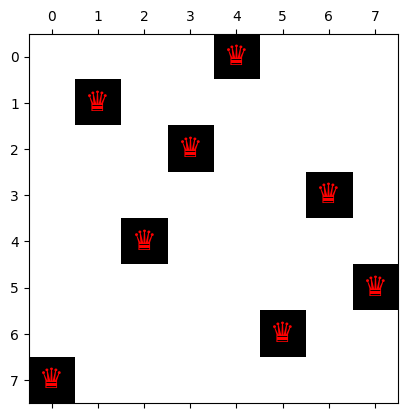

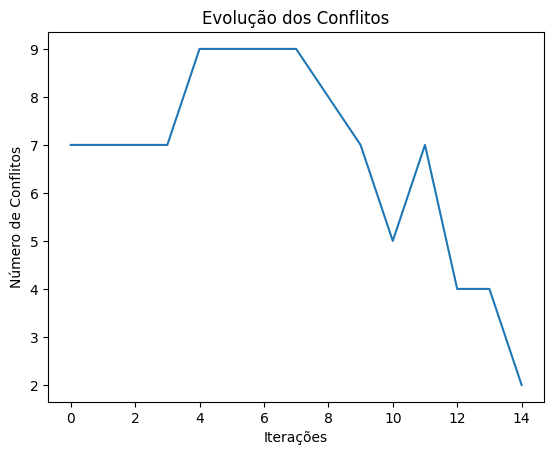

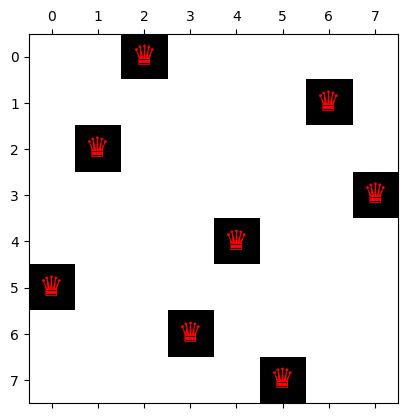

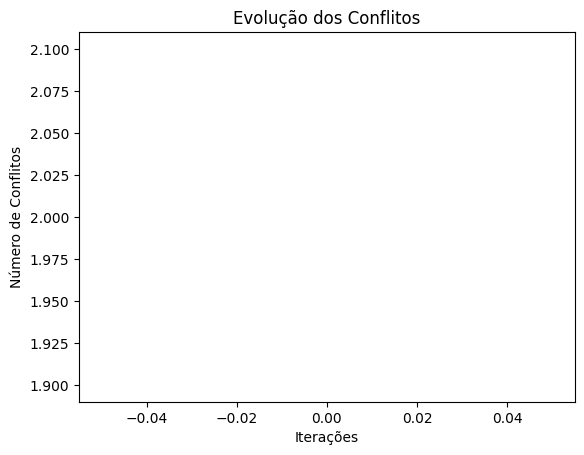

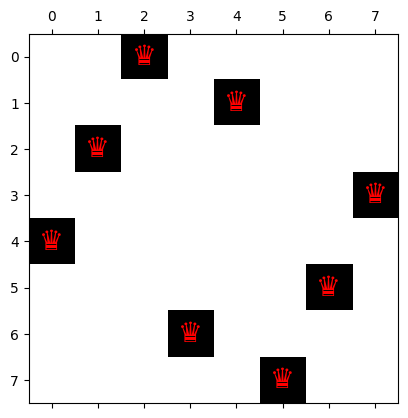

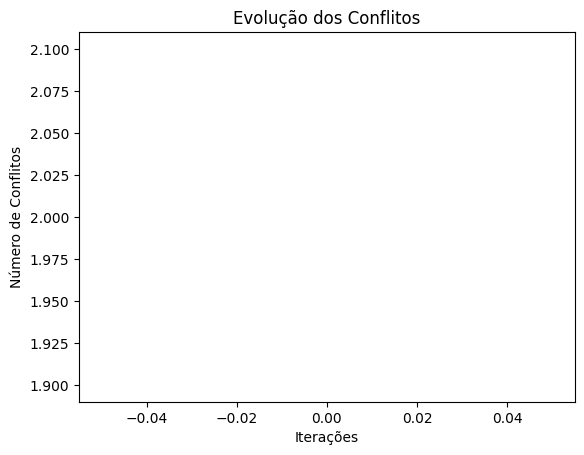

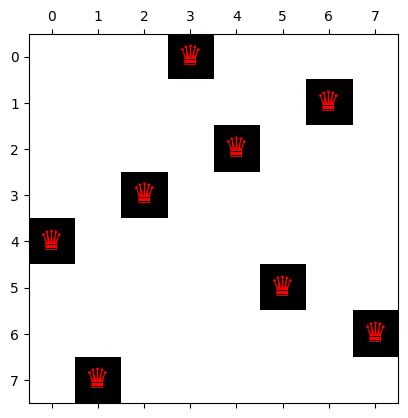

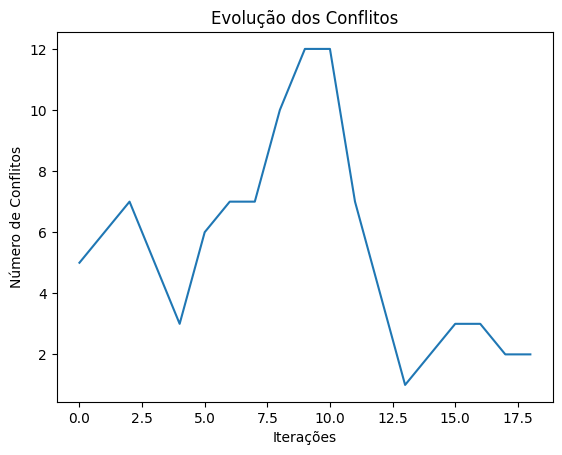

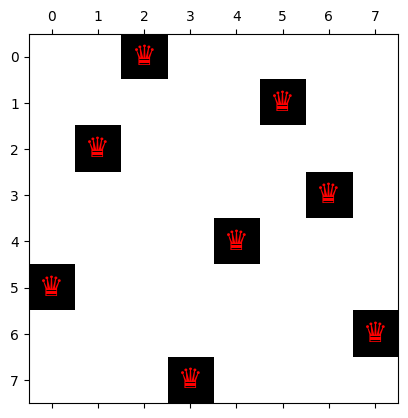

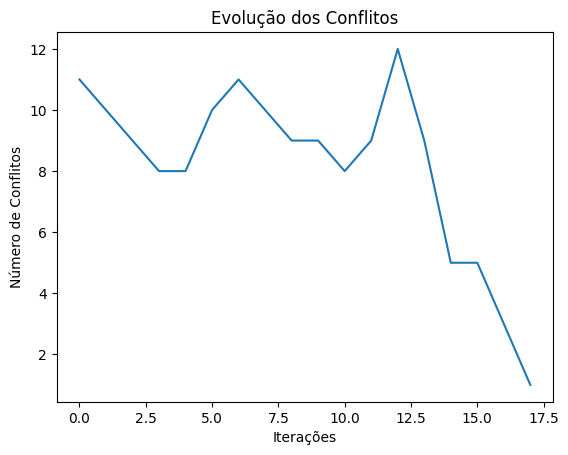

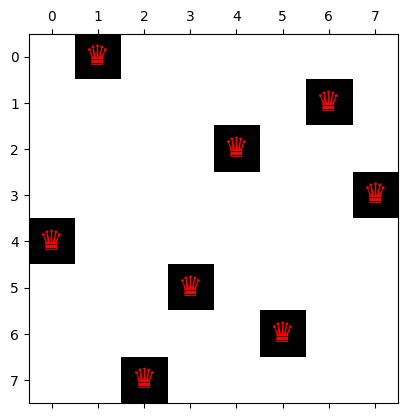

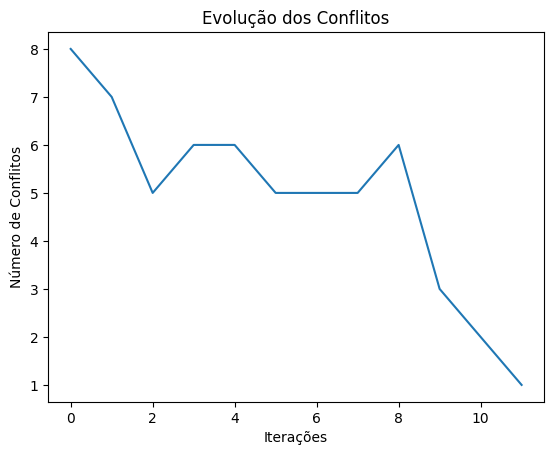

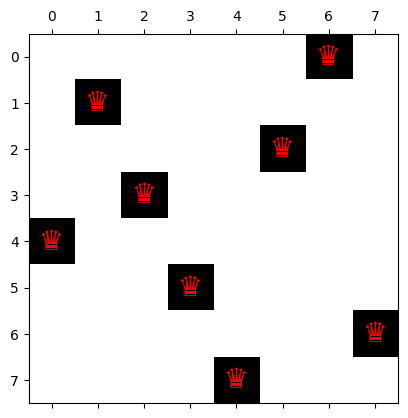

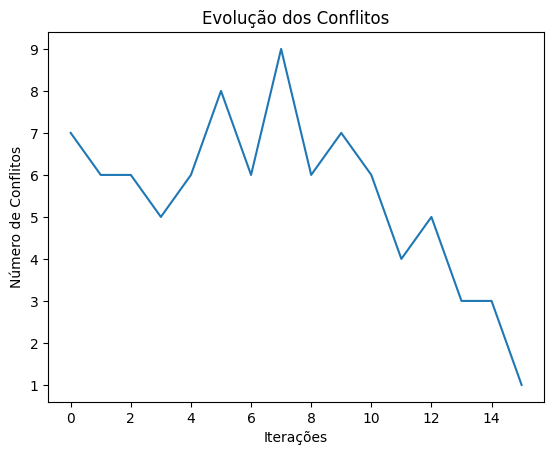

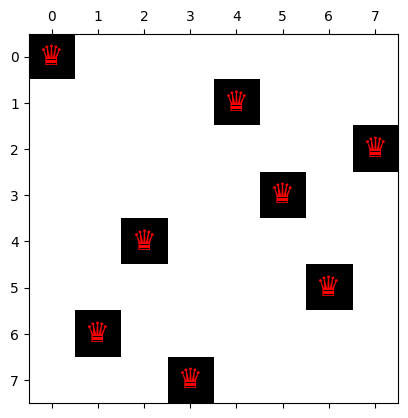

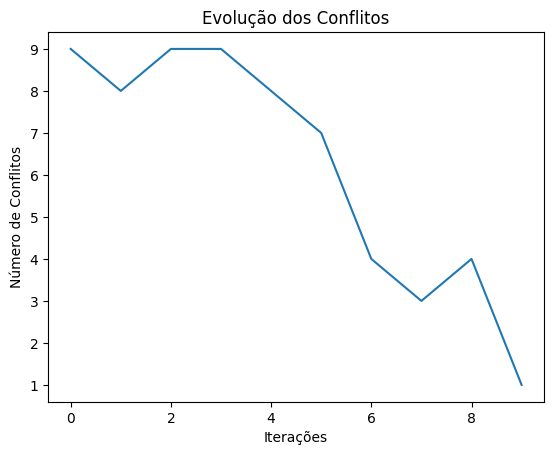

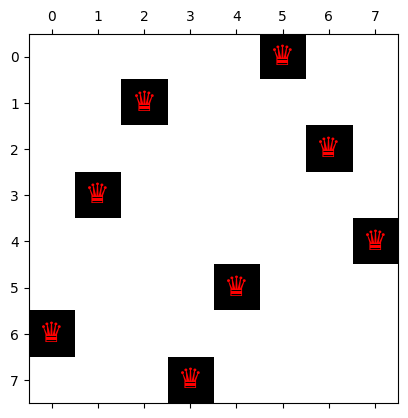

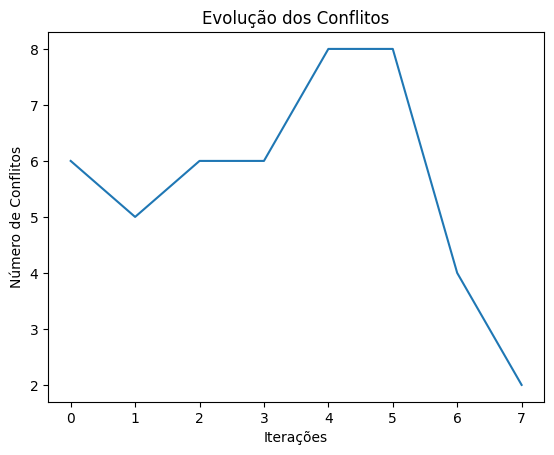

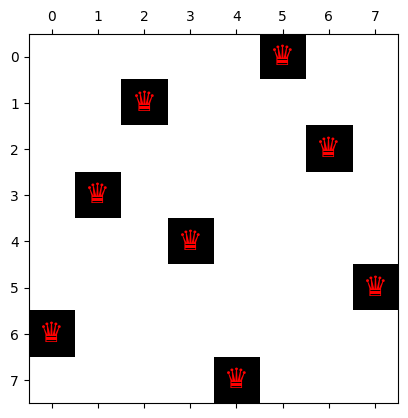

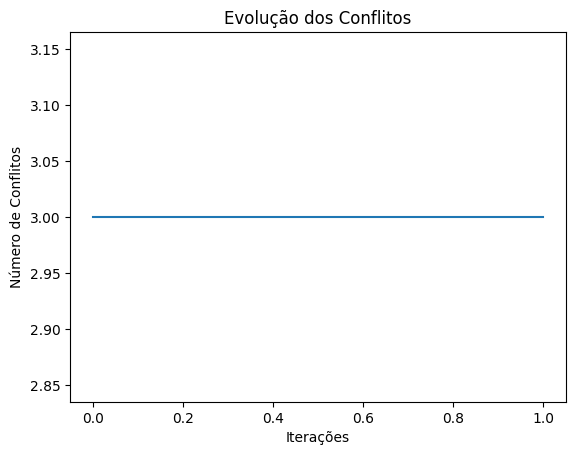

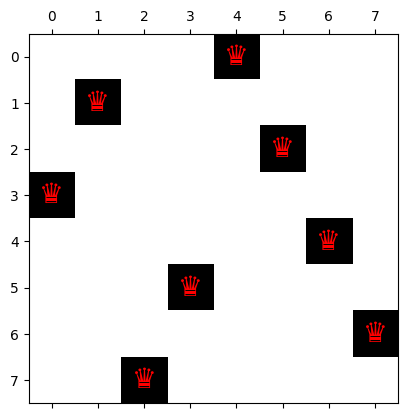

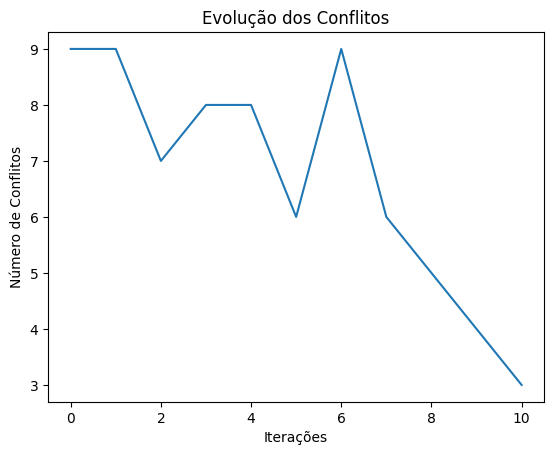

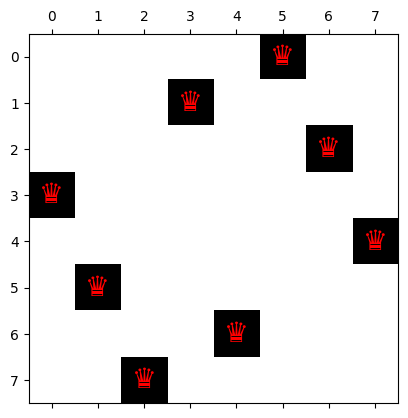

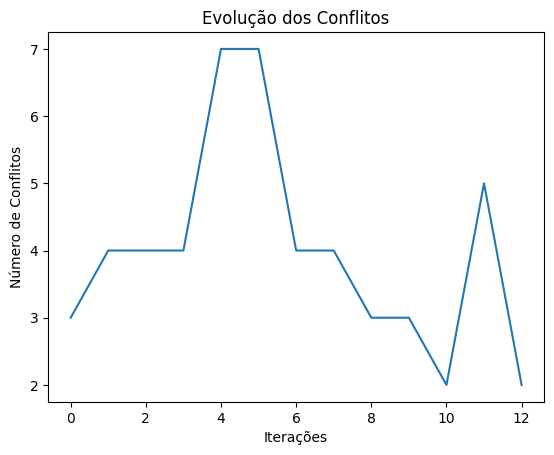

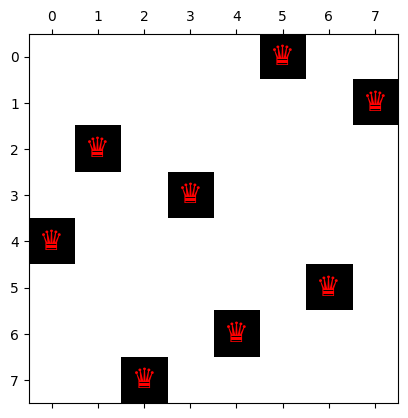

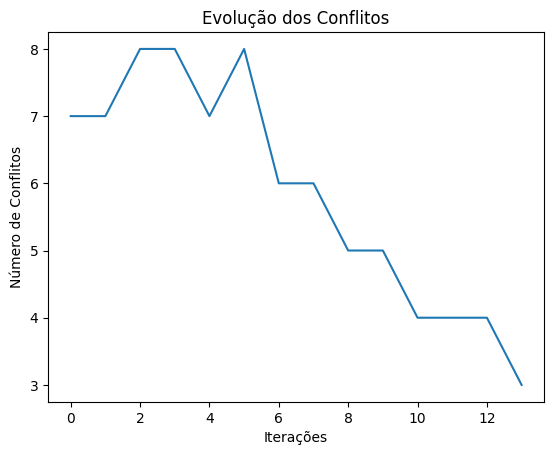

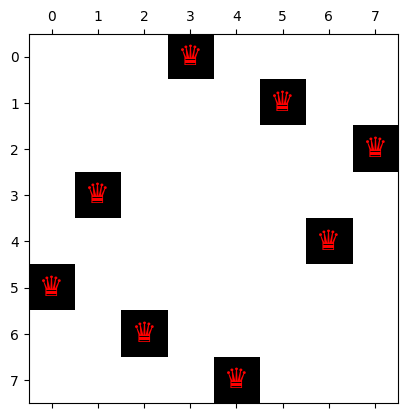

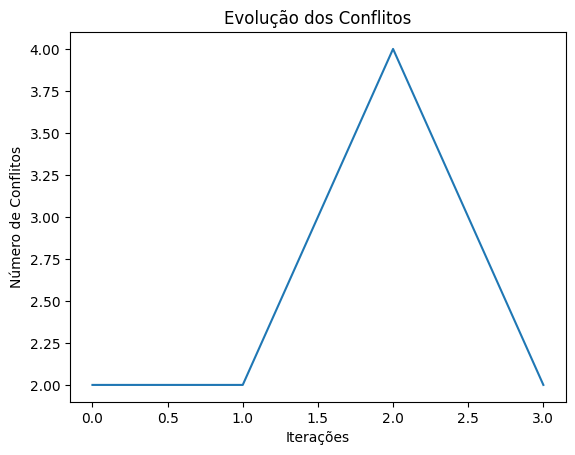

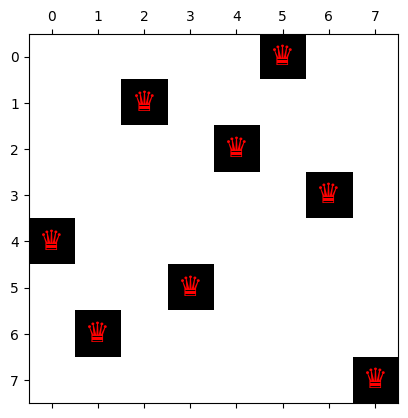

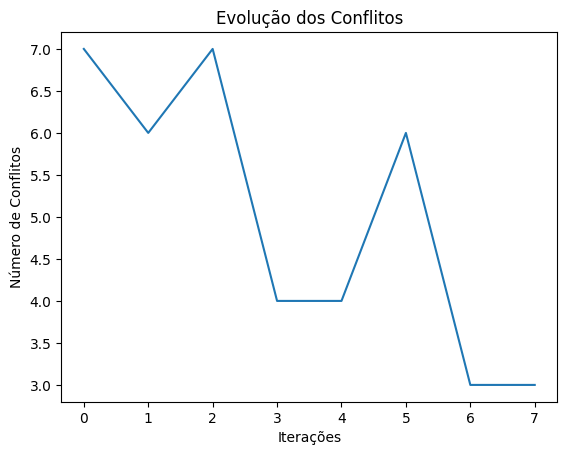

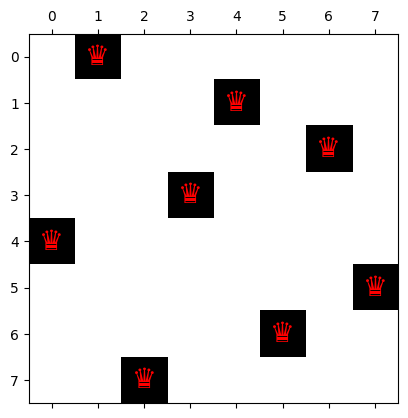

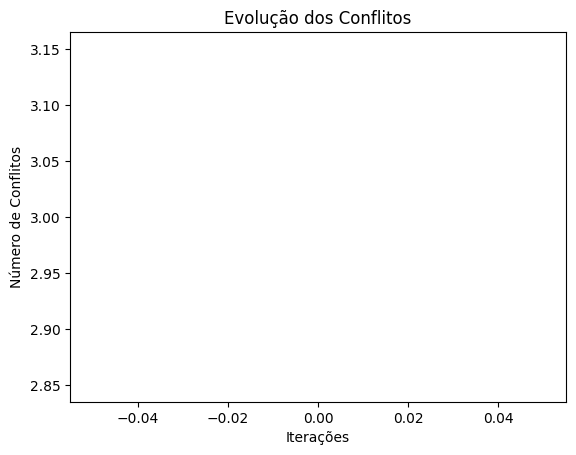

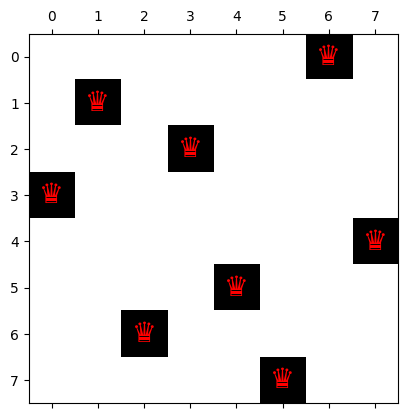

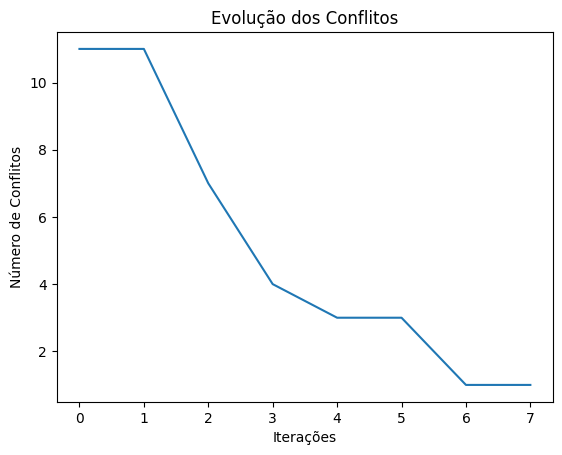

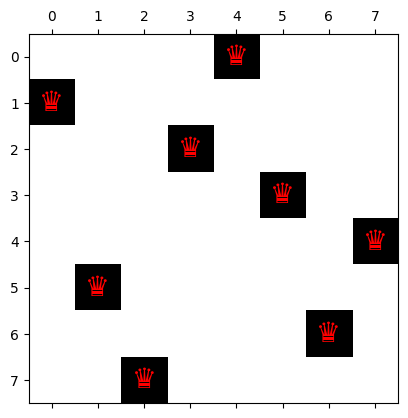

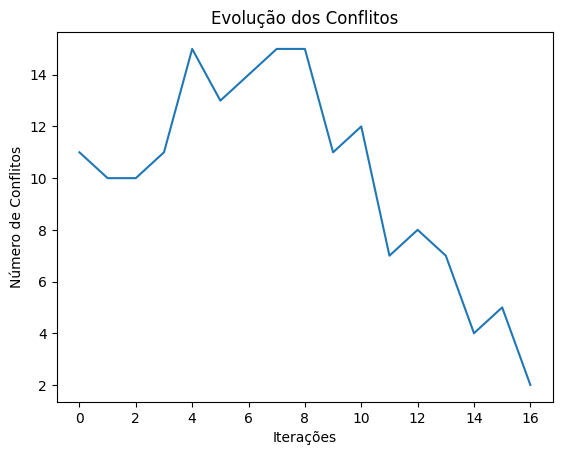

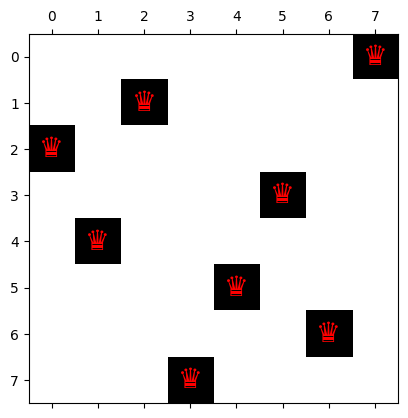

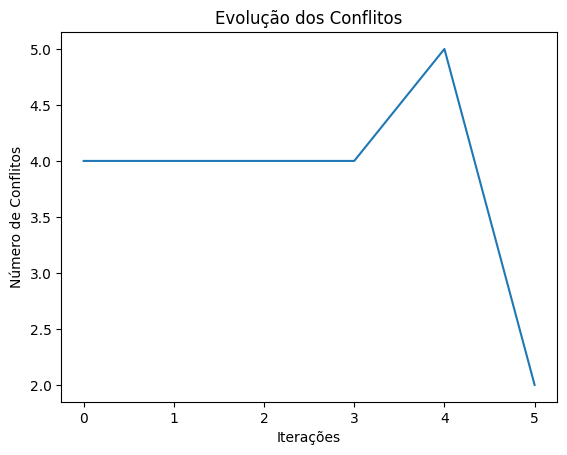

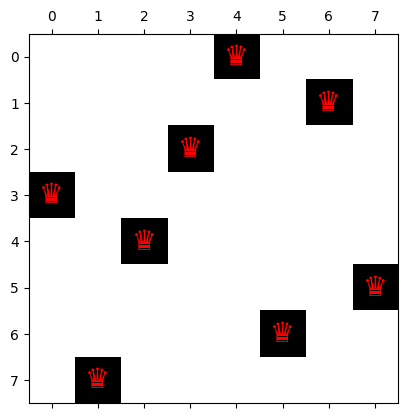

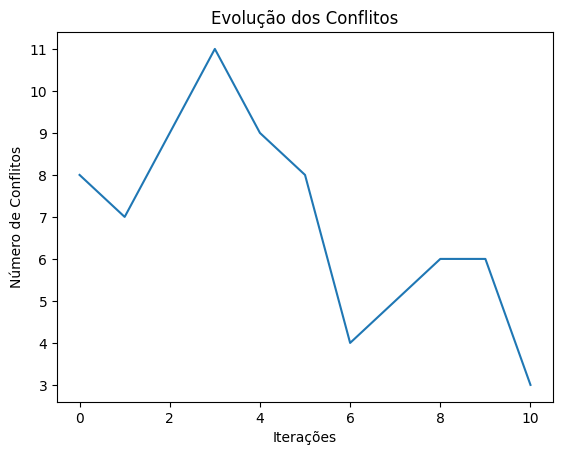

Total de soluções encontradas: 20
Tempo total: 60.12 segundos
Iterações totais: 2988220


In [24]:
todas_solucoes = encontrar_todas_solucoes()

Solução 1: (4, 7, 3, 0, 2, 5, 1, 6)


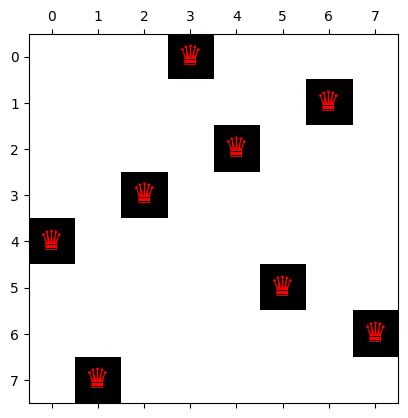

Solução 2: (5, 2, 0, 6, 4, 7, 1, 3)


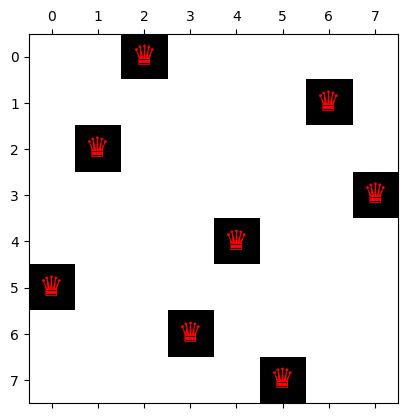

Solução 3: (3, 5, 7, 1, 6, 0, 2, 4)


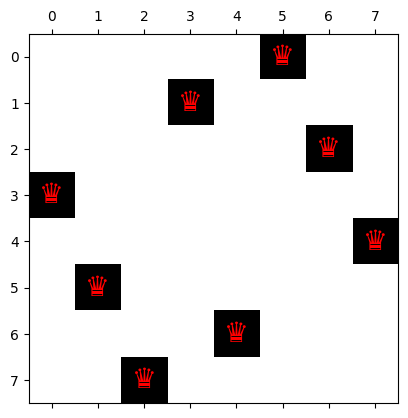

Solução 4: (4, 6, 1, 5, 2, 0, 3, 7)


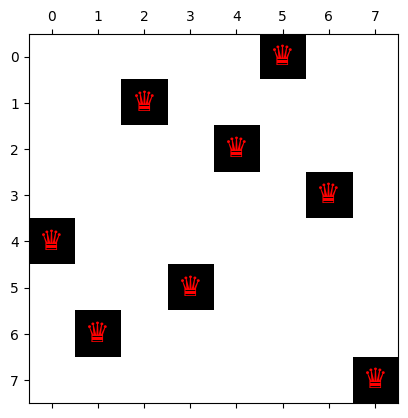

Solução 5: (4, 0, 7, 3, 1, 6, 2, 5)


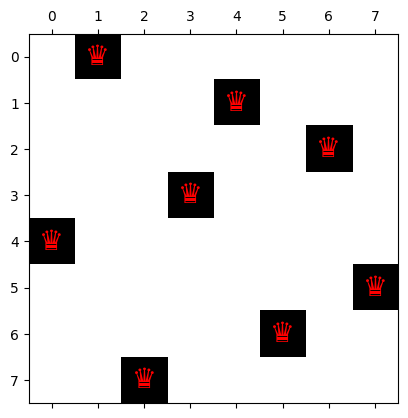

Solução 6: (3, 1, 6, 2, 5, 7, 0, 4)


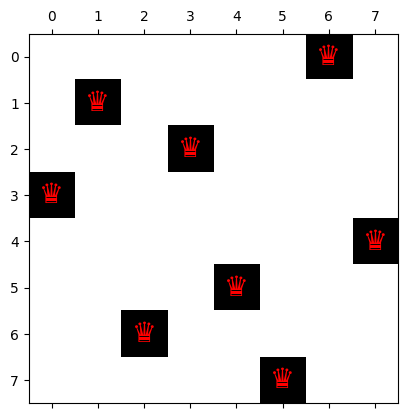

Solução 7: (5, 3, 6, 0, 7, 1, 4, 2)


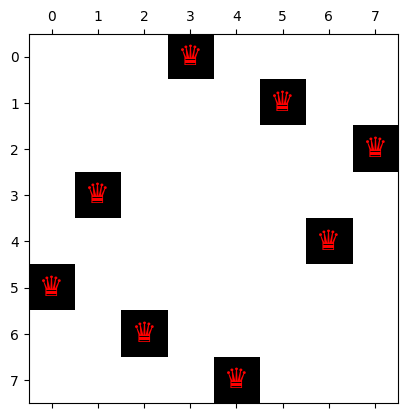

Solução 8: (7, 1, 4, 2, 0, 6, 3, 5)


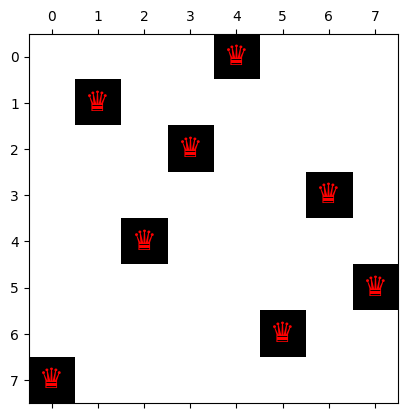

Solução 9: (4, 1, 3, 5, 7, 2, 0, 6)


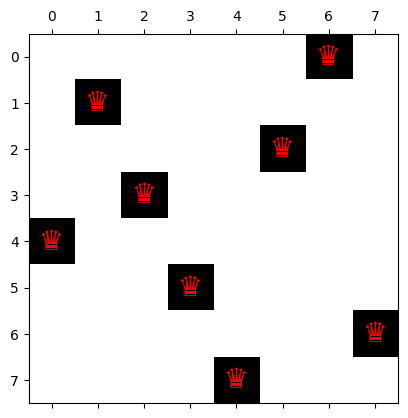

Solução 10: (4, 0, 7, 5, 2, 6, 1, 3)


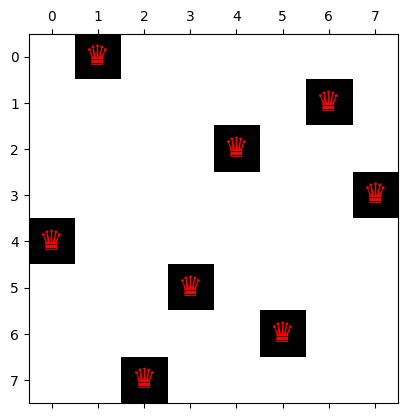

Solução 11: (4, 2, 0, 6, 1, 7, 5, 3)


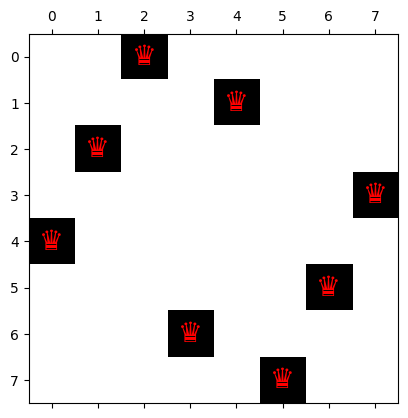

Solução 12: (4, 2, 7, 3, 6, 0, 5, 1)


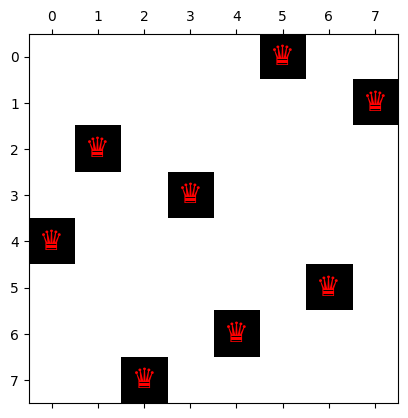

Solução 13: (1, 5, 7, 2, 0, 3, 6, 4)


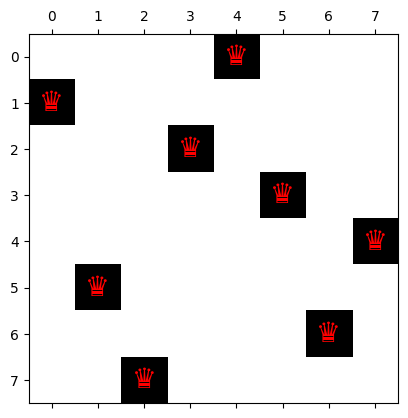

Solução 14: (6, 3, 1, 4, 7, 0, 2, 5)


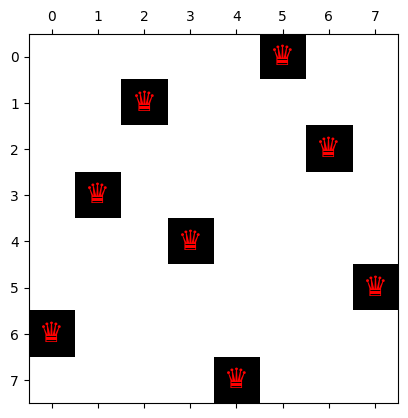

Solução 15: (5, 2, 0, 7, 4, 1, 3, 6)


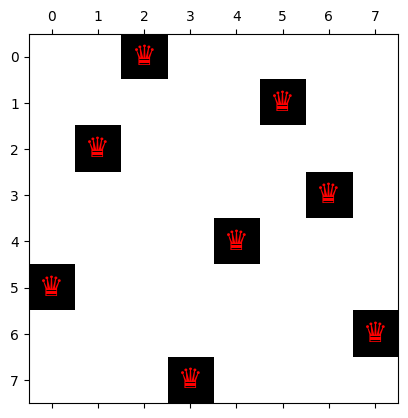

Solução 16: (3, 7, 4, 2, 0, 6, 1, 5)


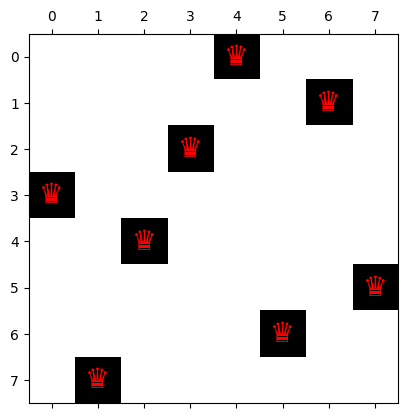

Solução 17: (2, 4, 1, 7, 5, 3, 6, 0)


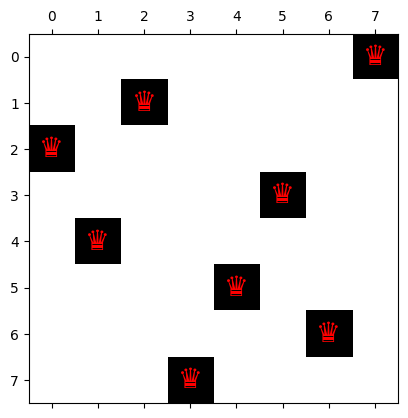

Solução 18: (0, 6, 4, 7, 1, 3, 5, 2)


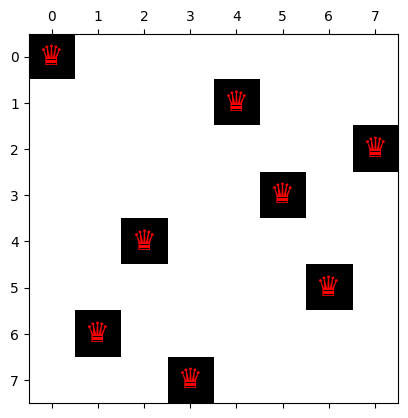

Solução 19: (6, 3, 1, 7, 5, 0, 2, 4)


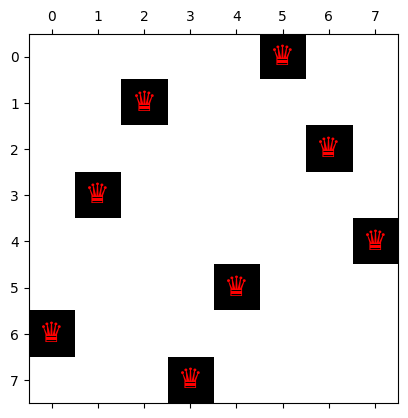

Solução 20: (3, 1, 7, 5, 0, 2, 4, 6)


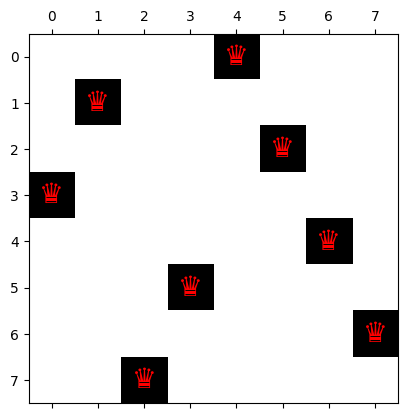

In [25]:
exibir_solucoes(todas_solucoes)